## Convolutional Neural Network



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [34]:
from keras.models import Sequential
from keras import layers
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16, MobileNetV2
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import keras
import matplotlib.pyplot as plt
import numpy as np

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [2]:
# if you are using google colab for this task you can mount your GoogleDrive as follows:
from google.colab import drive
drive.mount('/content/drive/')
# After running this cell you should enter the authorization code from your Google account

Mounted at /content/drive/


In [ ]:
!unzip ./drive/MyDrive/datasets_itmo/Cats_and_Dogs.zip -d ./

In [4]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = "./Cats_and_Dogs/train"
val = "./Cats_and_Dogs/val"
test = "./Cats_and_Dogs/test"

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 256

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [5]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [12]:
nb_train_samples = 20000
nb_validation_samples = 2490
nb_test_samples = 2500

Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [54]:
model = Sequential()

# 1: +Convolutional
# For example:
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
#     +Relu
model.add(Activation('relu'))
# 2: +Pooling
model.add(layers.MaxPooling2D((2, 2)))
# 3:
model.add(Conv2D(32, (3, 3)))
#     +Relu
model.add(Activation('relu'))

# 4:  +Pooling
model.add(layers.MaxPooling2D((2, 2)))
# 5:  +Convolutional
model.add(Conv2D(64, (3, 3)))
#     +Relu
model.add(Activation('relu'))

# 6:  +Pooling
model.add(layers.MaxPooling2D((2, 2)))
# 7:  +Flattening
model.add(layers.Flatten())
# 8:  +Dense
model.add(layers.Dense(64))
#     +ReLu
model.add(Activation('relu'))
# 9:  +Dropout
model.add(layers.Dropout(0.2))
# 10: +Dense
model.add(layers.Dense(1))
#     +Sigmoid
model.add(Activation('sigmoid'))

In [55]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [56]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

hist = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=20, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

<ipython-input-56-c6206298f2e4>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/20
78/78 [==============================] - 49s 600ms/step - loss: 0.6771 - accuracy: 0.5721 - val_loss: 0.6044 - val_accuracy: 0.6549
Epoch 2/20
78/78 [==============================] - 45s 572ms/step - loss: 0.5687 - accuracy: 0.7066 - val_loss: 0.5377 - val_accuracy: 0.7283
Epoch 3/20
78/78 [==============================] - 50s 643ms/step - loss: 0.5137 - accuracy: 0.7463 - val_loss: 0.5462 - val_accuracy: 0.7331
Epoch 4/20
78/78 [==============================] - 48s 616ms/step - loss: 0.4722 - accuracy: 0.7784 - val_loss: 0.4672 - val_accuracy: 0.7817
Epoch 5/20
78/78 [==============================] - 46s 581ms/step - loss: 0.4323 - accuracy: 0.8031 - val_loss: 0.4438 - val_accuracy: 0.7982
Epoch 6/20
78/78 [==============================] - 46s 594ms/step - loss: 0.3993 - accuracy: 0.8226 - val_loss: 0.4264 - val_accuracy: 0.8069
Epoch 7/20
78/78 [==============================] - 51s 651ms/step - loss: 0.3682 - accuracy: 0.8358 - val_loss: 0.4158 - val_accuracy: 0.8056

In [59]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

<ipython-input-59-c8e87d0acc6d>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 82.73%


Plot the graphs:

- Loss(Number of epochs)

- Accuracy(Number of epochs)

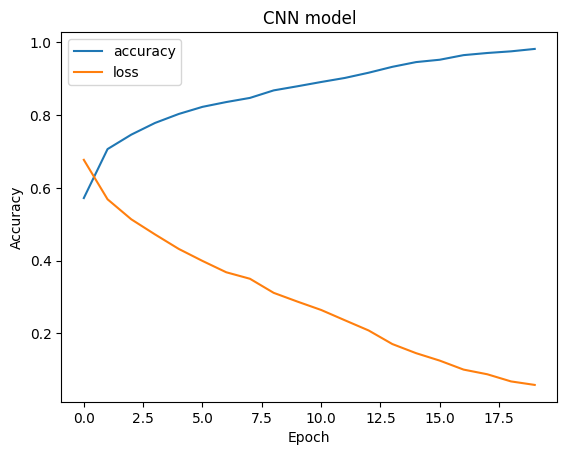

In [61]:
plt.plot(hist.history["accuracy"], label="accuracy")
plt.plot(hist.history["loss"], label="loss")
plt.title("CNN model")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

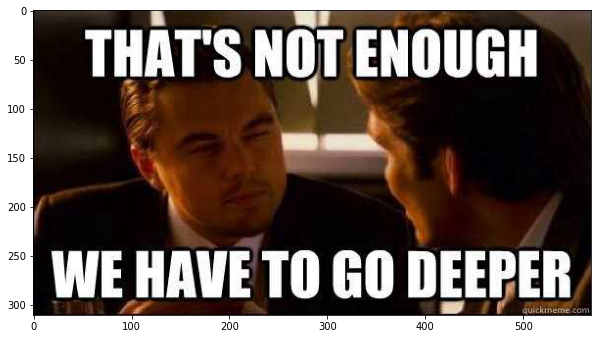

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('/content/drive/My Drive/Deeper.jpeg')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()


Let's try to improve the quality of recognition, using the method of transfer lerning.

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [15]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet',
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [16]:
# add layers to VGG16:

model = Sequential()
model.add(vgg16_net)
# + flattening
model.add(layers.Flatten())
# + Dense fullyconnected layer with 256 neurons
model.add(layers.Dense(256))
# + ReLu
model.add(Activation('relu'))
# + Dropout
model.add(layers.Dropout(0.2))
# + Dense layer with 1 neuron
model.add(layers.Dense(1))
# + sigmoid
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 activation_5 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
 activation_6 (Activation)   (None, 1)                

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5),
              metrics=['accuracy'])

E.g., it was like:


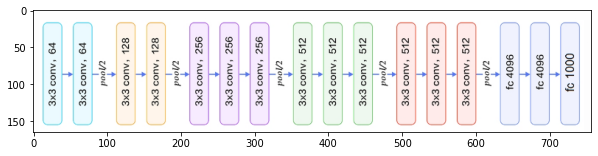

In [ ]:
img = mpimg.imread('/content/drive/My Drive/VGG16.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

and it becomes:

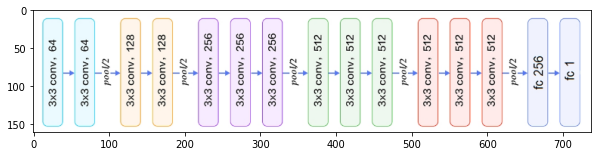

In [ ]:
img = mpimg.imread('/content/drive/My Drive/VGG162.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

In [18]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

hist = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=6, # just to change the value
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

<ipython-input-18-452111e32c21>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/6
78/78 [==============================] - 76s 758ms/step - loss: 0.4670 - accuracy: 0.8079 - val_loss: 0.2504 - val_accuracy: 0.9076
Epoch 2/6
78/78 [==============================] - 54s 684ms/step - loss: 0.2322 - accuracy: 0.9030 - val_loss: 0.2204 - val_accuracy: 0.9167
Epoch 3/6
78/78 [==============================] - 59s 745ms/step - loss: 0.1998 - accuracy: 0.9179 - val_loss: 0.2133 - val_accuracy: 0.9136
Epoch 4/6
78/78 [==============================] - 58s 739ms/step - loss: 0.1771 - accuracy: 0.9278 - val_loss: 0.1995 - val_accuracy: 0.9210
Epoch 5/6
78/78 [==============================] - 54s 683ms/step - loss: 0.1591 - accuracy: 0.9359 - val_loss: 0.2027 - val_accuracy: 0.9236
Epoch 6/6
78/78 [==============================] - 54s 692ms/step - loss: 0.1427 - accuracy: 0.9439 - val_loss: 0.2043 - val_accuracy: 0.9258


In [19]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

<ipython-input-19-dca356712a64>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 90.84%


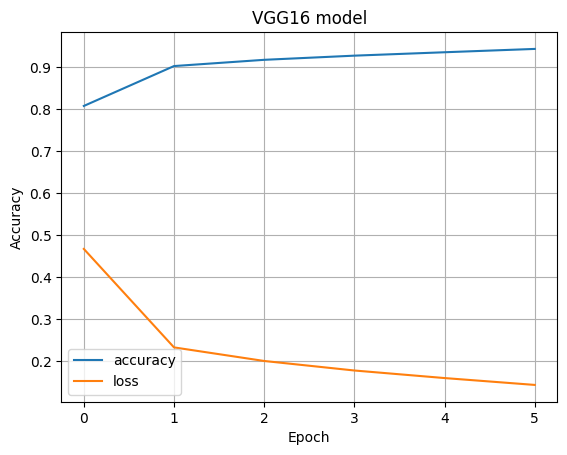

In [25]:
plt.plot(hist.history["accuracy"], label="accuracy")
plt.plot(hist.history["loss"], label="loss")
plt.title("VGG16 model")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.grid()
plt.legend(loc="best")
plt.show()

## MobileNetV2

In [26]:
mnet = MobileNetV2(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
mnet.trainable = False
mnet.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 75, 75, 32)           864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 75, 75, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReL

In [27]:
model = Sequential()
model.add(mnet)
model.add(layers.Flatten())
model.add(layers.Dense(256))
model.add(Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_2 (Flatten)         (None, 32000)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               8192256   
                                                                 
 activation_7 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                      

In [29]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-5),
              metrics=['accuracy'])

In [30]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=6,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

<ipython-input-30-0ccfab81f529>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/6
78/78 [==============================] - 59s 677ms/step - loss: 0.2265 - accuracy: 0.9104 - val_loss: 0.1098 - val_accuracy: 0.9488
Epoch 2/6
78/78 [==============================] - 49s 627ms/step - loss: 0.1093 - accuracy: 0.9584 - val_loss: 0.0978 - val_accuracy: 0.9566
Epoch 3/6
78/78 [==============================] - 60s 767ms/step - loss: 0.0837 - accuracy: 0.9672 - val_loss: 0.0932 - val_accuracy: 0.9592
Epoch 4/6
78/78 [==============================] - 47s 606ms/step - loss: 0.0687 - accuracy: 0.9743 - val_loss: 0.0878 - val_accuracy: 0.9614
Epoch 5/6
78/78 [==============================] - 54s 691ms/step - loss: 0.0553 - accuracy: 0.9804 - val_loss: 0.0879 - val_accuracy: 0.9614
Epoch 6/6
78/78 [==============================] - 52s 672ms/step - loss: 0.0437 - accuracy: 0.9867 - val_loss: 0.0852 - val_accuracy: 0.9640


In [31]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

<ipython-input-31-dca356712a64>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 96.27%


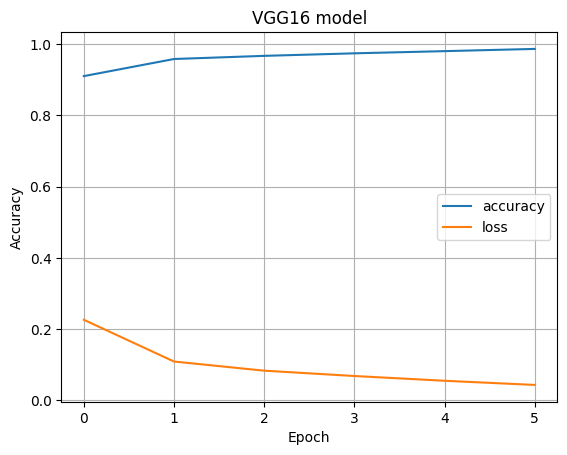

In [32]:
plt.plot(hist.history["accuracy"], label="accuracy")
plt.plot(hist.history["loss"], label="loss")
plt.title("VGG16 model")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.grid()
plt.legend(loc="best")
plt.show()

### Testing custom imgs

In [46]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

cats are zero - > dogs are 1

In [50]:
path1 = "./drive/MyDrive/datasets_itmo/cat1.jpg"
path2 = "./drive/MyDrive/datasets_itmo/cat2.jpg"
path3 = "./drive/MyDrive/datasets_itmo/dog1.jpg"

true_labels = ["Cat", "Cat", "Dog"]
paths = [path1, path2, path3]

In [41]:
from keras.utils import load_img, img_to_array

1/1 [==============================] - 0s 40ms/step
res: 0.0


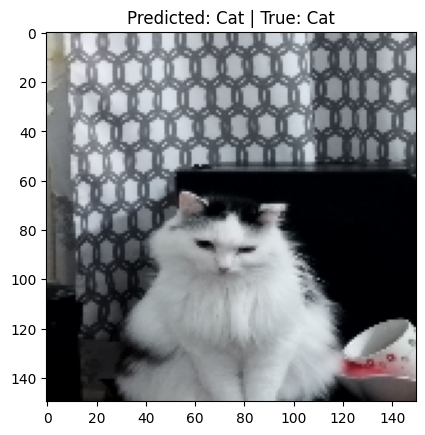

1/1 [==============================] - 0s 22ms/step
res: 0.0


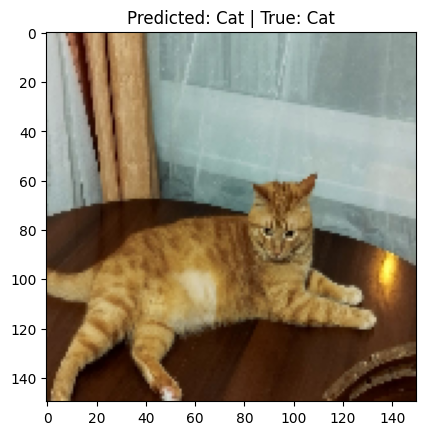

1/1 [==============================] - 0s 23ms/step
res: 0.9449999928474426


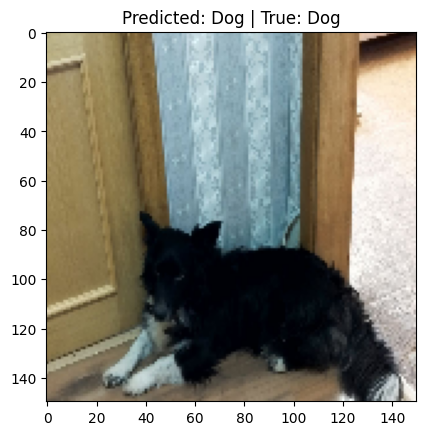

In [53]:
for i, p in enumerate(paths):
    img = load_img(p, target_size=(150, 150))
    p_image = keras.applications.mobilenet.preprocess_input(np.expand_dims(img_to_array(img), axis=0))
    results = model.predict(p_image)

    print(f"res: {np.round(results[0][0], 3)}")
    plt.imshow(img)
    plt.title(f"Predicted: {'Cat' if results[0][0] < 0.5 else 'Dog'} | True: {true_labels[i]}")
    plt.show()

The network correctly classified my pets